# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"



In [4]:
# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, how='outer',on='Mouse ID')


# Display the data table for preview

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.

num_mice = combined_df['Mouse ID'].nunique()
num_mice


249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mice_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
dup_mice_df

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mice_df = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_df)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df['Mouse ID'].nunique()
clean_mice


249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
stdv = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"mean Tumor Volume":mean,
                        "median Tumer Volume":median,
                        "Tumor Volume variance":var,
                        "Tumor Volume std. Dev":stdv,
                        "Tumor Volume std. Err.":sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,mean Tumor Volume,median Tumer Volume,Tumor Volume variance,Tumor Volume std. Dev,Tumor Volume std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

sum_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
sum_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# We need to create group series using Drug Regimen column and count the number of data points in each Drug Regimen.

mice_count = clean_df['Drug Regimen'].value_counts()
mice_count


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

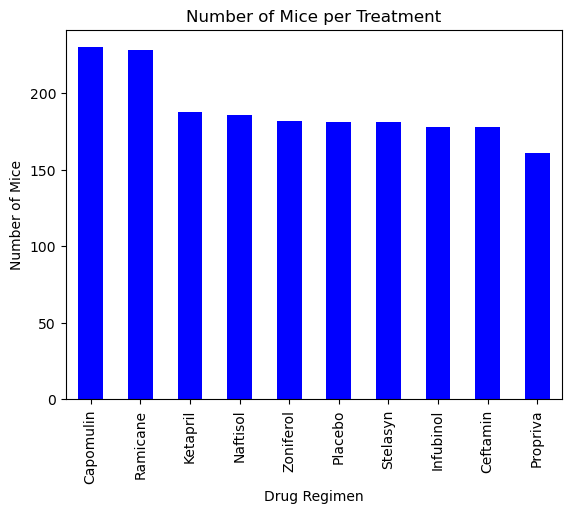

In [15]:
# Generate the bar plot based on the group series above 

plot_pd = mice_count.plot.bar(color='b')
plot_pd

# Set labels and title

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

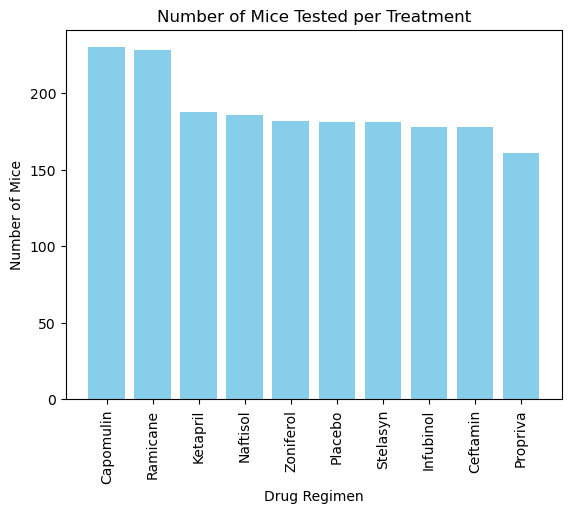

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

# Creat a bar plot using pyplot based on the group series above

plt.bar(x_axis, y_axis, color='skyblue', alpha=1, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


In [17]:
# Get the total counts of Male and female mice

gender_counts = clean_df['Sex'].value_counts()
gender_counts

Sex
Male      958
Female    935
Name: count, dtype: int64

In [38]:
# Generate the actual percentage value based on gender

total_male_mice = 958 
total_female_mice = 935  
  
percentage_female = (total_female_mice / (total_female_mice + total_male_mice)) * 100
percentage_male = (total_male_mice / (total_female_mice + total_male_mice)) * 100

sizes = [percentage_female, percentage_male]
sizes


[49.39249867934495, 50.60750132065505]

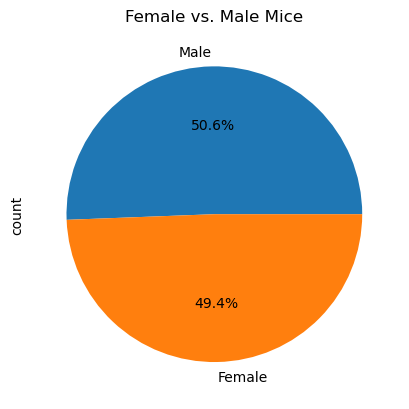

In [39]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

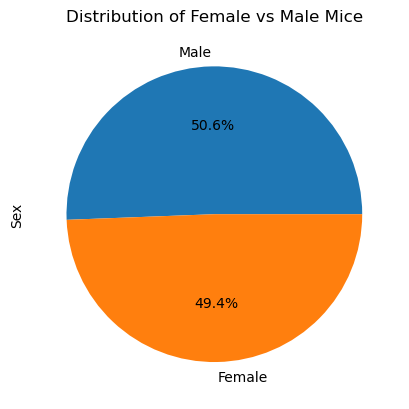

In [44]:
#  Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
sizes = [50.60750132065505, 49.39249867934495]

# Create the pie chart

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

- Put treatments into a list for for loop (and later for plot labels)

- Create empty list to fill with tumor vol data (for plotting)

- Calculate the IQR and quantitatively determine if there are any potential outliers. 

- Locate the rows which contain mice on each drug and get the tumor volumes

- Add subset 

- Determine outliers using upper and lower bounds

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [22]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_tumor = Capomulin_merge['Tumor Volume (mm3)']
quartiles = Capomulin_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles [0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound}) could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644
values below 20.70456164999999 could be outliers.
values above 51.83201549) could be outliers.


In [23]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [24]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Ramicane_tumor = Ramicane_merge['Tumor Volume (mm3)']
quartiles = Ramicane_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles [0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound}) could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
values below 17.912664470000003 could be outliers.
values above 54.30681135) could be outliers.


In [25]:
# Infubinol

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Infubinol_tumor = Infubinol_merge['Tumor Volume (mm3)']
quartiles = Infubinol_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles [0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound}) could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
values below 36.83290494999999 could be outliers.
values above 82.74144559000001) could be outliers.


In [27]:
# Ceftamin

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [28]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Ceftamin_tumor = Ceftamin_merge['Tumor Volume (mm3)']
quartiles = Ceftamin_tumor.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors : {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles [0.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"values below {lower_bound} could be outliers.")
print(f"values above {upper_bound}) could be outliers.")

The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors : 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
values below 25.355449580000002 could be outliers.
values above 87.66645829999999) could be outliers.


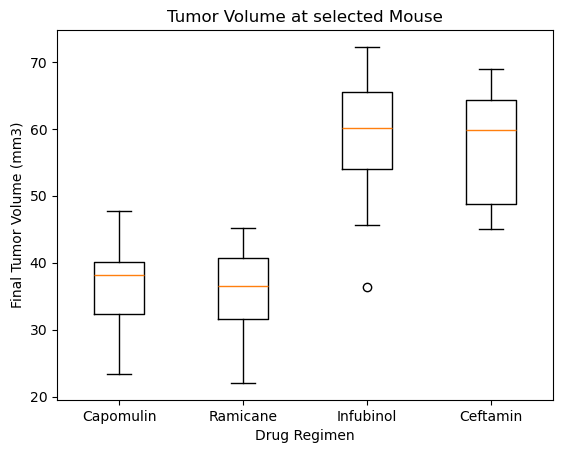

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#data_to_plot = ['data_to_plot'].values
fig1, ax1=plt.subplots()
ax1.set_title('Tumor Volume at selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen,  widths=0.4, vert=True)
plt.show()


## Line and Scatter Plots

In [30]:
# Display unique Mouse IDs in the dataset
unique_mouse_ids = Capomulin_df['Mouse ID'].unique()
print("Available Mouse IDs:", unique_mouse_ids)

Available Mouse IDs: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


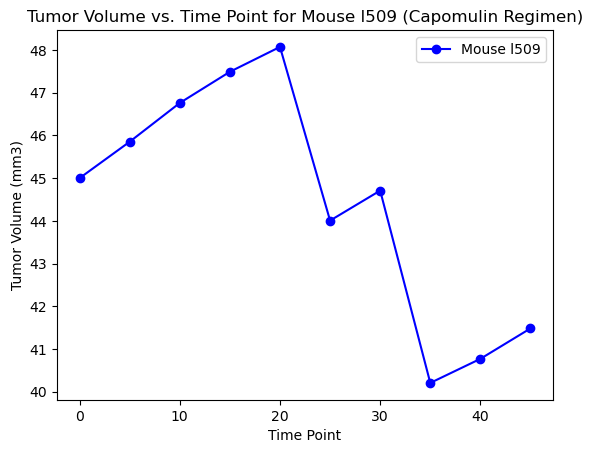

In [31]:
# Choose a single mouse ID treated with Capomulin
mouse_id = 'l509'  # Replace 'YourMouseID' with the actual Mouse ID you want to plot

# Filter data for the selected mouse and Capomulin regimen
selected_mouse_data = Capomulin_df[(Capomulin_df['Mouse ID'] == 'l509') & (Capomulin_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', label=f'Mouse {mouse_id}')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Regimen)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

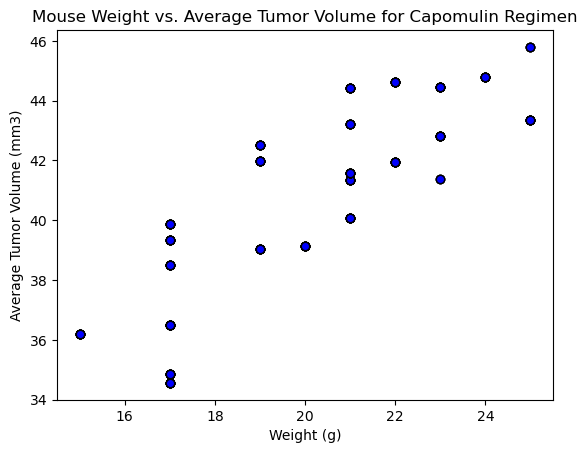

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original dataset to get the corresponding mouse weights
merged_data = pd.merge(Capomulin_df, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

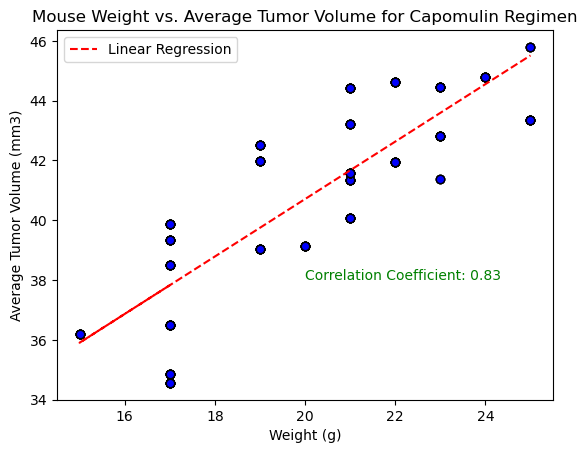

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculate the average tumor volume for each mouse
average_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original dataset to get the corresponding mouse weights
merged_data = pd.merge(Capomulin_df, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)_average'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'])

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', linestyle='--', label='Linear Regression')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the correlation coefficient in the plot
plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='green')

# Show the legend
plt.legend()

# Show the plot
plt.show()
